# Лабораторная работа №4

1. Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма).
2. Зависимость от выбора оптимизационного метода.
3. Количество эпох = 50.
4. Сравните результаты и сделайте выводы.


In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = 0.0
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    avg_loss = train_loss / len(dataloader) 
    return avg_loss

In [7]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return correct, test_loss

In [8]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    train_losses = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        avg_train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_losses.append(avg_train_loss)
        
    print("Done!")
    return train_losses

learning_rate = 0.001
epochs = 50

В качестве оптимизационных методов были выбраны:
- **SGD**
- **RMSprop**
- **Adam**

In [10]:
loss_fn = nn.CrossEntropyLoss()

# SGD
model_sgd = NeuralNetwork()
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=learning_rate)
train_loss_sgd = run_training(epochs, train_dataloader, model_sgd, loss_fn, optimizer_sgd)
print(f"Test Loss SGD: {train_loss_sgd}")

# RMSprop
model_rms = NeuralNetwork()
optimizer_rms = torch.optim.RMSprop(model_rms.parameters(), lr=learning_rate, alpha=0.9)
train_loss_rms = run_training(epochs, train_dataloader, model_rms, loss_fn, optimizer_rms)
print(f"Test Loss RMSprop: {train_loss_rms}")

# Adam
model_adam = NeuralNetwork()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=learning_rate)
train_loss_adam = run_training(epochs, train_dataloader, model_adam, loss_fn, optimizer_adam)
print(f"Test Loss Adam: {train_loss_adam}")

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

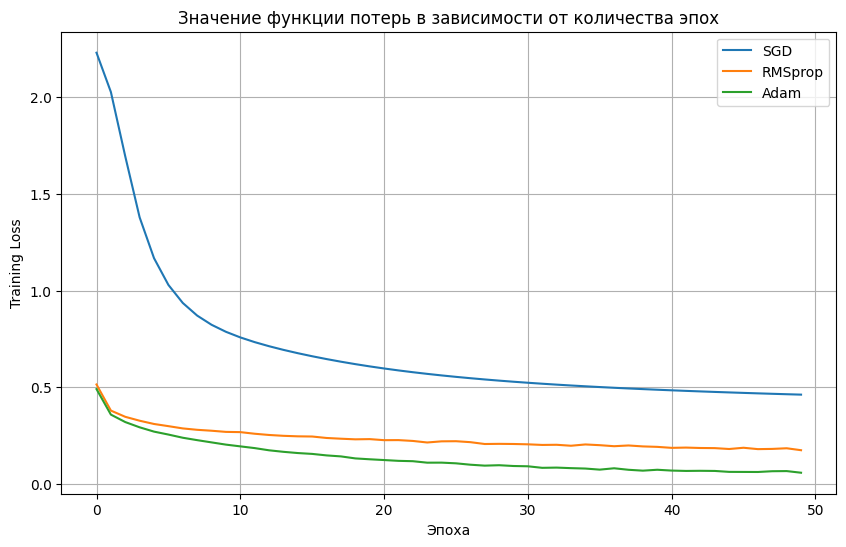

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss_sgd, label="SGD")
plt.plot(train_loss_rms, label="RMSprop")
plt.plot(train_loss_adam, label="Adam")
plt.xlabel("Эпоха")
plt.ylabel("Training Loss")
plt.title("Значение функции потерь в зависимости от количества эпох")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
loss_data = {
    "Epoch": list(range(1, epochs + 1)),
    "SGD Loss": train_loss_sgd,
    "RMSprop Loss": train_loss_rms,
    "Adam Loss": train_loss_adam,
}

loss_df = pd.DataFrame(loss_data)
loss_df.to_csv("4lab_training_losses.csv", index=False)

### Выводы

Выводы сделаны на основе графика и значений функции потерь(файл 4lab_training_losses.csv)

На 1-й итерации оптимизационные методы показали следующие значения функции потерь:
- **SGD**: 2.23
- **RMSprop**: 0.51
- **Adam**: 0.49

Начальное значение функции потерь у оптимизатора SGD является наибольшим. Это связано с тем, что Adam и RMSprop имеют адаптивные свойства из-за этого они могут подстраиваться под данные,а у SGD одинаковая скорость обучения на всех эпохах обучения

#### Сходимость оптимизационных методов
- **SGD**: На начальных эпохах (1–10) показывает большие перепады значений функции потерь. Это также связано с тем, что оптимизатор использует постоянную скорость обучения
- **RMSprop** и **Adam**: Эти оптимизаторы даже на начальных эпохах не имеют резких колебаний, адаптивные свойства позволяют сглаживать значения функции потерь

#### Скорость сходимости
- **SGD**: За 50 эпох значения функции потерь снижается до 0.46
- **RMSprop**: За 50 эпох достигает значения функции потерь 0.17
- **Adam**: Показывает наиболее быструю сходимость и к 50-й эпохе достигает минимального значения функции потерь в 0.06.

#### После 50 эпох
- **SGD**: 0.46
- **RMSprop**: 0.17
- **Adam**: 0.06

### Итог
- **Adam** является наиболее эффективным оптимизатором. Он имеет наибольшую скорость снижения значения функции потерь, а также является наиболее стабильным по сходимости. Он быстрее достигает минимальных значений функции потерь по сравнению с RMSprop и SGD.
- **RMSprop** также показывает хорошие результаты и стабильность, но немного уступает Adam по скорости сходимости
- **SGD** значительно уступает оптимизаторам RMSprop и Adam. Имеет значительно меньшую скорость сходимости, колебания на начальных эпохах
